# Arithmetic Operations on Images

## Goal

* Learn several arithmetic operations on images like 
    * addition, 
    * subtraction, 
    * bitwise operations 
    * etc.
* You will learn these functions : 
    * `cv2.add()`, 
    * `cv2.addWeighted()` 
    * etc.

## Image Addition

You can add two images by **OpenCV** function, `cv2.add()` or simply by numpy operation, `res = img1 + img2`. Both images should be of same depth and type, or second image can just be a scalar value.

> ## Note
>
> There is a difference between `OpenCV addition` and `Numpy addition`. 
> `OpenCV addition` is a saturated operation while `Numpy addition` is a modulo operation.

For example, consider below sample:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x = np.uint8([250,250,250,250])
y = np.uint8([10,10,10,10])

# 250+10 = 260 => 255
print(cv2.add(x,y))

# 250+10 = 260 % 256 = 4
print(x+y)

[[260.]
 [260.]
 [260.]
 [260.]]
[4 4 4 4]


It will be more visible when you add two images. **OpenCV function** will provide a better result. So, always better stick to OpenCV functions.

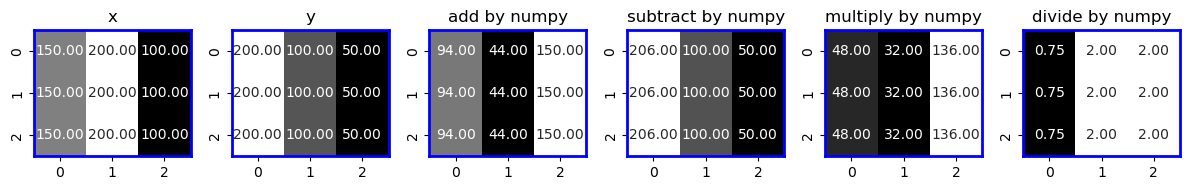

In [3]:
def show_heatmap(ax,title,img):
  ax.set_title(title)
  sns.heatmap(img,annot=True,fmt='.2f',cmap=plt.cm.gray, ax =ax, 
              cbar=False, linewidth=0, linecolor='blue')
  for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_edgecolor('blue')
    spine.set_linewidth(2)

x = np.array([[150,200,100],
              [150,200,100],
              [150,200,100]],
             dtype=np.uint8
             )
y = np.array([[200,100,50],
              [200,100,50],
              [200,100,50]],
             dtype=np.uint8)

add      = x + y
subtract = x - y
multiply = x * y
divide   = x / y


fig, axs = plt.subplots(1,6, figsize=(12,2))

show_heatmap(axs[0],'x',x)
show_heatmap(axs[1],'y',y)
show_heatmap(axs[2],'add by numpy',add)
show_heatmap(axs[3],'subtract by numpy',subtract)
show_heatmap(axs[4],'multiply by numpy', multiply)
show_heatmap(axs[5],'divide by numpy', divide)

plt.tight_layout()
plt.show()

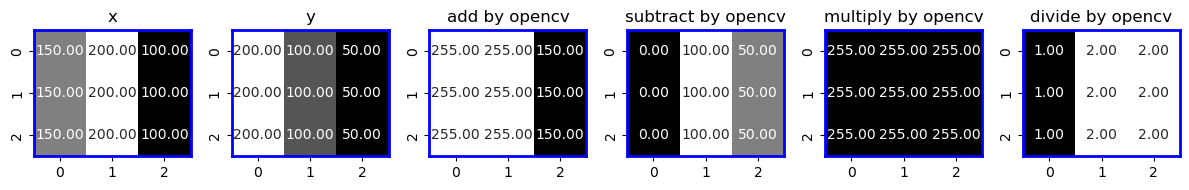

In [4]:
add = cv2.add(x ,y)
sub = cv2.subtract(x, y)
mul = cv2.multiply(x ,y)
div = cv2.divide(x ,y)

fig, axs = plt.subplots(1,6, figsize=(12,2))

show_heatmap(axs[0],'x',x)
show_heatmap(axs[1],'y',y)
show_heatmap(axs[2],'add by opencv',add)
show_heatmap(axs[3],'subtract by opencv',sub)
show_heatmap(axs[4],'multiply by opencv', mul)
show_heatmap(axs[5],'divide by opencv', div)    # 200/3 = 66.666..... but in the case of opencv 200/3 = 67

plt.tight_layout()
plt.show()

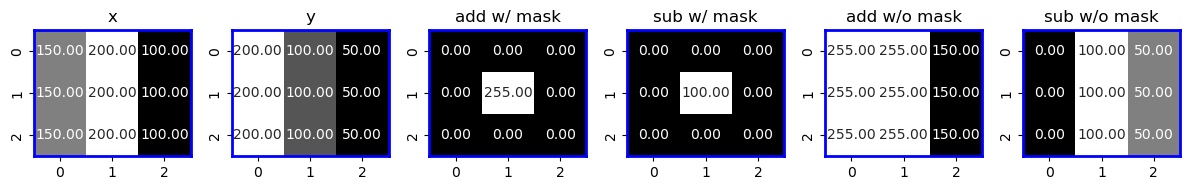

In [5]:
mask = np.zeros(shape=(3,3), dtype=np.uint8)
mask[1,1] = 1

add_m = cv2.add(x,y,None,mask=mask)
sub_m = cv2.subtract(x,y,None,mask=mask)
add   = cv2.add(x,y,None,mask=None)
sub   = cv2.subtract(x,y,None,mask=None)


fig, axs = plt.subplots(1,6,figsize=(12,2))

show_heatmap(axs[0],'x',x)
show_heatmap(axs[1],'y',y)
show_heatmap(axs[2],'add w/ mask',add_m)
show_heatmap(axs[3],'sub w/ mask',sub_m)
show_heatmap(axs[4],'add w/o mask',add)
show_heatmap(axs[5],'sub w/o mask',sub)

# cv2.add(x,y,x,mask=mask) # the result of addition will be stored to x
# draw_subheatmap('mask',mask,'add',x)
plt.tight_layout()
plt.show()

## Image Blending (or $\alpha$ blending)

This is also image addtion, but different weights are given to images so that it gives a feeling of blending or trasparency. Images are added as per the equation below:

$$
g(x) = (1-\alpha) f_0 (x) + \alpha f_1 (x)
$$

By varing $\alpha$ from 0 to 1, you can perform a cool transition b/w one image to another

Here I took two images to blend them together. 
* First image is given a weight of 0.7 and 
* second image is given a weight of 0.3. 

`cv2.addWeight()` applies following equation on the image.

$$
\text{dst} = \alpha \cdot \text{img}_1 + \beta \cdot \text{img}_2 + \gamma
$$

Here $\gamma$ is taken as zero

In [6]:
import requests
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def download_imgs(f_str):
    os.makedirs('./tmp',exist_ok=True)
    url = f'https://raw.githubusercontent.com/dsaint31x/OpenCV_Python_Tutorial/master/DIP/img/{f_str}'
    image_ndarray = np.asarray(bytearray(requests.get(url).content), dtype=np.uint8)
    img = cv2.imdecode(image_ndarray, cv2.IMREAD_UNCHANGED)
    cv2.imwrite(f'./tmp/{f_str}', img)
    
f_strs = [
    'wing_wall.jpg', 
    'yate.jpg', 
    'face02.PNG',
    'man_face.jpg',
    'messi5.jpg',
    'opencv_logo.png',
]

for c in f_strs:
    download_imgs(c)


(480, 640, 3)
(480, 640, 3)


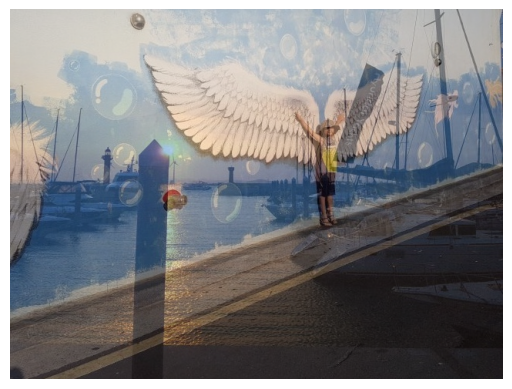

In [7]:
import os

colab_path = './tmp'
fstr_0 = os.path.join(colab_path,'wing_wall.jpg')
fstr_1 = os.path.join(colab_path,'yate.jpg')

def show_imgs(ax, title, img):
    ax.imshow(img[...,::-1])
    ax.set_title(title)
    ax.set_xticks([]); ax.set_yticks([])

img_0 = cv2.imread(fstr_0)
img_1 = cv2.imread(fstr_1)
img_0 = cv2.resize(img_0, dsize=(img_1.shape[1],img_1.shape[0]), interpolation= cv2.INTER_AREA)
print(img_0.shape)
print(img_1.shape)

dst = cv2.addWeighted(img_0,0.5, img_1,0.5,0)


plt.imshow(dst[:,:,::-1])
plt.axis('off')
plt.show()

# cv2.imshow('dst',dst)
# cv2.waitKey(0)
# cv2.destroyWindow('dst')

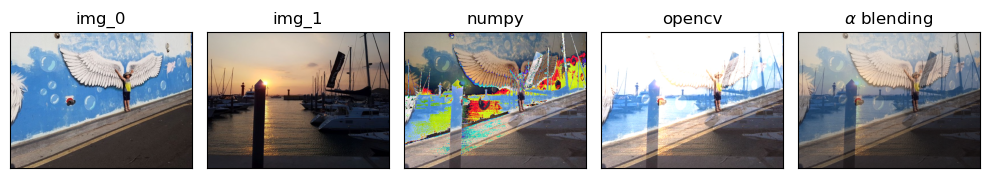

In [8]:
ret_0 = img_0+img_1
ret_1 = cv2.add(img_0, img_1)

fig, axs = plt.subplots(1,5, figsize=(10,2))

show_imgs(axs[0], 'img_0', img_0)
show_imgs(axs[1], 'img_1', img_1)
show_imgs(axs[2], 'numpy', ret_0)
show_imgs(axs[3], 'opencv', ret_1)
show_imgs(axs[4], r'$\alpha$ blending', dst)

plt.tight_layout()
plt.show()

# face morphing

[ref. about jupyter widget](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html)

In [9]:
d_img_1.shape[1::-1]

NameError: name 'd_img_1' is not defined

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def f(x):
  global d_img_0, d_img_1
  alpha = x/100
  ret = cv2.addWeighted(d_img_0, alpha, d_img_1, 1-alpha,0)
  fig, ax = plt.subplots(1,1,figsize=(3,3))
  ax.imshow(ret[:,:,::-1])

colab_path = './tmp'
fstr_0 = os.path.join(colab_path,'face02.PNG')
fstr_1 = os.path.join(colab_path,'man_face.jpg')

d_img_0 = cv2.imread(fstr_0)
d_img_1 = cv2.imread(fstr_1)
d_img_0 = cv2.resize(d_img_0, 
                     dsize=d_img_1.shape[1::-1], 
                     interpolation= cv2.INTER_AREA,
                     )

interact(f, x=widgets.IntSlider(min=0, max=100, step=10, value=0, continuous_update=True))

interactive(children=(IntSlider(value=0, description='x', step=10), Output()), _dom_classes=('widget-interact'…

<function __main__.f(x)>

## Bitwise Operations

This includes bitwise **AND**, **OR**, **NOT** and **XOR** operations. 
* They will be highly useful while **extracting any part of the image**
* defining and working with non-rectangular ROI etc.


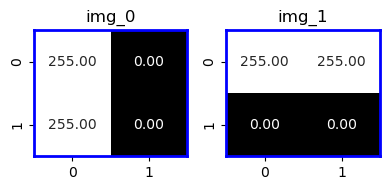

In [10]:
img_0 = np.zeros(shape=(2,2), dtype=np.uint8)
img_0[:,:1]= 255 
img_1 = np.zeros_like(img_0)
img_1[:1,:]= 255

fig, axs = plt.subplots(1,2, figsize=(4,2))
show_heatmap(axs[0], 'img_0', img_0)
show_heatmap(axs[1], 'img_1', img_1)
plt.tight_layout()
plt.show()

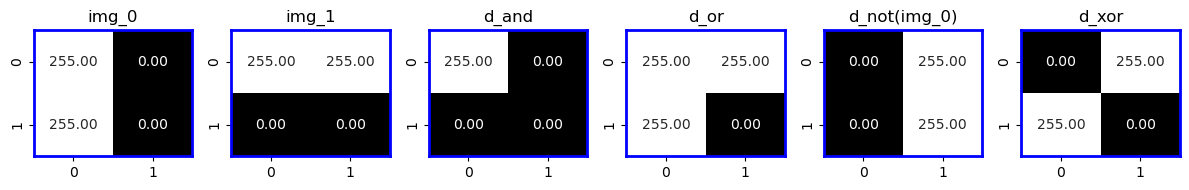

In [11]:
d_and = cv2.bitwise_and(img_0,img_1)
d_or  = cv2.bitwise_or (img_0,img_1)
d_not = cv2.bitwise_not(img_0)
d_xor = cv2.bitwise_xor(img_0,img_1)

fig, axs = plt.subplots(1,6, figsize=(12,2))
show_heatmap(axs[0], 'img_0', img_0)
show_heatmap(axs[1], 'img_1', img_1)
show_heatmap(axs[2], 'd_and', d_and)
show_heatmap(axs[3], 'd_or' , d_or)
show_heatmap(axs[4], 'd_not(img_0)', d_not)
show_heatmap(axs[5], 'd_xor', d_xor)
plt.tight_layout()
plt.show()